# What factors significantly impact and determine whether a movie is successful?

##### **Laura Anyanwu, Claire Lee, and Su'ad Mohamud**

## **Introduction**

According to [“How Will the Movies Survive the Next 10 Years?”](<https://www.nytimes.com/interactive/2019/06/20/movies/movie-industry-future.html),  the movie industry is beginning to see a lot of changes that affect the profitability and “success” of a film. When major Hollywood figures were questioned about the future of movies, it brought on a discussion about  

*   What drives individuals to the movie theatres? 
*   What makes certain movies worthy of watching at the movie theatres? (“theatricality”) 

In this tutorial, we went in with the assumption that profit generated from a film will be the determining factor of a film's success. We seek to analyze and interpret movie data from 1946 to 2015 to see what factors contributed to the profit of a given film. We look at factors such as gross, budget, IMDb scores, movie directors, and content-rating in order to determine a film’s success. We hope to be able to determine what factors of a film contribute to it's "success" and  how those factors help increase a film's "theatricality". 


### Required Libraries 

Throughout this tutorial, we will use Python 3 as well as various libraries such as [pandas](https://pandas.pydata.org/pandas-docs/stable/), [numpy](https://numpy.org/doc/), [matplotlib](https://matplotlib.org/3.1.1/contents.html), [scipy](https://docs.scipy.org/), [sklearn](https://scikit-learn.org/), and more to manipulate and explore our datasets. 

A reoccuring feature within our tutorial was an [interactive dropdown widget](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) that allows the user to view different plots corresponding to a specific list of a common exploration. 

In [1]:
!pip install nbinteract
import nbinteract as nbi
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random
from ipywidgets import widgets, interactive
import statsmodels.formula.api as sm
import sklearn as sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats

     |████████████████████████████████| 4.7MB 5.5MB/s eta 0:00:01
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=3972a7ccfeb936bd318cb74440815949ffbbe5704759a322c203b0a04629a585
  Stored in directory: /home/jovyan/.cache/pip/wheels/9b/04/dd/7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
Successfully built docopt


## Dataset Source

The dataset used to explore the "success" of a film was [IMDB 5000 Movie Dataset](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset#movie_metadata.csv) from Kaggle. The dataset contains 5000+ movies that were scrapped from IMDb. 

The dataset included detailed information for each movie. The dataset has twenty-eight data categories that hold information such as title, director, main actors, genres, gross, budget, language,and more for each movie. The column headings are very descriptive, giving the users an exact understanding of the data that each column holds. 

If there are any questions regarding the column headings or the data, additional information can be found [here.](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset#movie_metadata.csv) 

In [2]:
movies = pd.read_csv('movie_metadata.csv')
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Modifying the Data 

We decided to remove and filter the data to narrow the variables we focused on. The data was filtered to only include movies from 1945 to 2015. We wanted to look at movies that correspond with the [beginning of advancements](https://historycooperative.org/the-history-of-the-hollywood-movie-industry/) within the film industry that can be comparable to the quality of films of the present day. 

Also, we decided to remove the columns that did not pertain to the focus of our data exploration. These columns included color, number of critics, number of facebook likes for the director, the number of users voted, total like count for cast members, and more.

Included within the dataset were movies that were missing values for columns such as gross, budget, and movie year. These factors were essential in our tutorial as they were used to establish relationships and perform calculations. Any movies that did not include these variables were removed from our dataset.

### Movie Dataset



In [3]:
#Dropped all attributes of the dataset that we are not concerned about
movies = movies.drop(columns = ['color', 'num_critic_for_reviews', 
                                'director_facebook_likes', 
                                'actor_1_facebook_likes', 'num_voted_users', 
                                'cast_total_facebook_likes', 
                                'actor_3_facebook_likes', 
                                'facenumber_in_poster', 'plot_keywords', 
                                'movie_imdb_link', 'num_user_for_reviews', 
                                'actor_2_facebook_likes', 'aspect_ratio', 
                                'movie_facebook_likes'])
# Drop all rows where either the gross, budget, and/or title_year are undefined
movies = movies.dropna(subset = ['gross'])
movies = movies.dropna(subset = ['budget'])
movies = movies.dropna(subset = ['title_year'])
# Sort the dataset by the title years so the oldest movies show up first and 
# the newest last
movies = movies.sort_values(by = ['title_year'])
# Dropping rows where the movie's title years are not within 1945-2015
movies = movies[movies.title_year > 1944]
movies = movies[movies.title_year < 2016]
periods = ['1940-1949', '1950 - 1959', '1960- 1969', '1970 - 1979',
           '1980 - 1989', '1990 - 1999', '2000 - 2009', '2010 - 2019']
movies['decades'] = pd.cut(movies['title_year'], bins=[1939, 1949, 1959, 1969, 
                                                       1979, 1989, 1999, 2009, 
                                                       2019], labels=periods)
movies['scores'] = pd.cut(movies['imdb_score'], bins = 11)
# Created a profit column so we can see how well received the movie was
movies['profit'] = movies['gross'] - movies['budget']
movies.head()

,director_name,duration,actor_2_name,gross,genres,actor_1_name,movie_title,actor_3_name,language,country,content_rating,budget,title_year,imdb_score,decades,scores,profit
4238,William Wyler,172.0,Teresa Wright,23650000.0,Drama|Romance|War,Myrna Loy,The Best Years of Our Lives,Dana Andrews,English,USA,Not Rated,2100000.0,1946.0,8.1,1940-1949,"(7.9, 8.6]",21550000.0
3596,King Vidor,144.0,Lillian Gish,20400000.0,Drama|Romance|Western,Joseph Cotten,Duel in the Sun,Jennifer Jones,English,USA,Unrated,8000000.0,1946.0,6.9,1940-1949,"(6.5, 7.2]",12400000.0
4328,Orson Welles,92.0,Everett Sloane,7927.0,Crime|Drama|Film-Noir|Mystery|Thriller,Rita Hayworth,The Lady from Shanghai,Ted de Corsia,English,USA,Not Rated,2300000.0,1947.0,7.7,1940-1949,"(7.2, 7.9]",-2292073.0
3978,Vincente Minnelli,102.0,Reginald Owen,2956000.0,Adventure|Comedy|Musical|Romance,Gladys Cooper,The Pirate,Ellen Ross,English,USA,Approved,3700000.0,1948.0,7.1,1940-1949,"(6.5, 7.2]",-744000.0
3974,George Sidney,107.0,Howard Keel,8000000.0,Biography|Comedy|Musical|Romance|Western,Keenan Wynn,Annie Get Your Gun,Betty Hutton,English,USA,Passed,3768785.0,1950.0,7.0,1950 - 1959,"(6.5, 7.2]",4231215.0


### Director-Movie Count Dataset

To provide more data analysis for the movie dataset, we decided to look at the relationship between directors and their films within the main movie dataset. 

Below is a dataset that includes the number of movies for thirty popular movie directors. We chose these thirty directors based on [IMDb's list of most popular directors](https://www.imdb.com/list/ls052380992/), as well as our own bias. 

As we can see, Steven Spielberg, Woody Allen, and Clint Eastwood directed the most movies. Alfred Hitchcock, Joon-ho Bong, Ryan Coogler, and Ava DuVernay directed the least. However, these factors can be due to the fact we had to trim our dataset to remove films that had no gross, budget, or title year. Not only that, but with directors that were more active in the 50s and 60s like Alfred Hitchcock, it is very possible that some of his movies were cut from our dataset. As for directors like Ava DuVernay and Ryan Coogler, they only began directing in 2012 and 2013, respectively, thus having fewer movies present on the dataset.

In [4]:
# Create a temporary data structure to hold the popular directors
dList = ['Steven Spielberg', 'Christopher Nolan', 'Quentin Tarantino', 
         'Martin Scorsese', 'David Fincher', 'Woody Allen', 'Robert Zemeckis', 
         'Ridley Scott', 'Francis Ford Coppola', 'Clint Eastwood', 
         'Frank Darabont', 'Joel Coen', 'Alfred Hitchcock', 'Sam Mendes', 
         'Danny Boyle', 'James Cameron', 'Ron Howard', 'Tim Burton', 
         'Darren Aronofsky', 'Roman Polanski', 'Spike Lee', 'Ava DuVernay', 
         'Ryan Coogler', 'Joon-ho Bong', 'George Lucas', 'Lee Daniels', 
         'Ang Lee', 'Chris Columbus', 'James Wan', 'Roland Emmerich']

# Create the director count per movie using the movies dataframe 
mc_d = {}
for director in dList: 
  for (i, row) in movies.iterrows():
    if director in row['director_name']:
      mc_d[director] = mc_d.get(director, 0) + 1

# Aesthetic of the dataframe 
mc_d = pd.DataFrame.from_dict(mc_d, orient='index')
mc_d = mc_d.reset_index()
mc_d.columns = ['Director', 'Movie Count']
mc_d = mc_d.sort_values(by = ['Movie Count'])
mc_d

,Director,Movie Count
12,Alfred Hitchcock,1
21,Ava DuVernay,2
23,Joon-ho Bong,2
22,Ryan Coogler,2
25,Lee Daniels,3
11,Joel Coen,4
10,Frank Darabont,4
19,Roman Polanski,4
24,George Lucas,5
28,James Wan,6


### Director Dataset

This dataset leaves only the rows of the thirty popular directors.

In [5]:
# Create a new dataframe that is sorted by director, but also cut out directors 
# that we are not focusing on
table = movies.sort_values(by = ['director_name'])
directors = table[table.director_name.isin(mc_d['Director'])]
directors.head()

,director_name,duration,actor_2_name,gross,genres,actor_1_name,movie_title,actor_3_name,language,country,content_rating,budget,title_year,imdb_score,decades,scores,profit
2242,Alfred Hitchcock,108.0,Vera Miles,32000000.0,Horror|Mystery|Thriller,Janet Leigh,Psycho,John Gavin,English,USA,R,806947.0,1960.0,8.5,1960- 1969,"(7.9, 8.6]",31193053.0
1506,Ang Lee,148.0,Jeffrey Dover,630779.0,Drama|Romance|War|Western,Jeremy W. Auman,Ride with the Devil,Tobey Maguire,English,USA,R,35000000.0,1999.0,6.8,1990 - 1999,"(6.5, 7.2]",-34369221.0
2442,Ang Lee,112.0,Kate Burton,7837632.0,Drama,Joan Allen,The Ice Storm,Henry Czerny,English,USA,R,18000000.0,1997.0,7.5,1990 - 1999,"(7.2, 7.9]",-10162368.0
223,Ang Lee,127.0,Rafe Spall,124976634.0,Adventure|Drama|Fantasy,Suraj Sharma,Life of Pi,Tabu,English,USA,PG,120000000.0,2012.0,8.0,2010 - 2019,"(7.9, 8.6]",4976634.0
167,Ang Lee,138.0,Regi Davis,132122995.0,Action|Sci-Fi,Kevin Rankin,Hulk,Celia Weston,English,USA,PG-13,137000000.0,2003.0,5.7,2000 - 2009,"(5.1, 5.8]",-4877005.0


### Genre-Movie Count Dataset
This dataframe was used to determine the amount of movies that were in each genre within the current movie dataset.


In [6]:
# This is a list of all the genres noted in the movies dataframe 
glist = movies['genres'].unique()
new_list= []

# Separates the list to the individual genres
for line in glist:
  item = line.split('|')
  new_list.extend(item)

# Make the individual genres unique
x = np.array(new_list)
genre_list = np.unique(x).tolist()

mc_genre = {}

# Create the genre count per movie using the movies dataframe 
for genre in genre_list: 
  for (i, row) in movies.iterrows():
    if genre in row['genres']:
      mc_genre[genre] = mc_genre.get(genre, 0) + 1


# Aesthetic of the dataframe 
mc_genre = pd.DataFrame.from_dict(mc_genre, orient='index')
mc_genre = mc_genre.reset_index()
mc_genre.columns = ['Genre', 'Movie Count']
mc_genre

,Genre,Movie Count
0,Action,934
1,Adventure,770
2,Animation,193
3,Biography,239
4,Comedy,1482
5,Crime,710
6,Documentary,67
7,Drama,1932
8,Family,439
9,Fantasy,503


### Genre-Profit Dataset
This dataframe is used to determine the profit that a genre made within a given year.

In [7]:
# Create a temporary data structure to hold the movies that are classified as 
# a genre
mov_genre = {}
for genre in genre_list:
  for (i, row) in movies.iterrows():
    movie = row['movie_title']
    if genre in row['genres']:
      mov_genre.setdefault(genre, []).append(movie)

# Function to format a dataframe for a genre that includes the profit per year. 
def genre_dataframe(df, g): 
  for (i, row) in df.iterrows():
      # Get the profit of a movie 
      profit = movies.loc[movies['movie_title'] == df[0][i], 
                          'profit'].values[0]
      # Get the year of the movie
      year = movies.loc[movies['movie_title'] == df[0][i], 
                        'title_year'].values[0]
      # Get the decade value of the movie 
      period = movies.loc[movies['movie_title'] == df[0][i], 
                          'decades'].values[0]

      # Place in the dataframe
      df.at[i, 'Genre'] = g
      df.at[i, 'Profit'] = profit
      df.at[i, 'Year'] = year
      df.at[i, 'Decade'] = period

  #Aesthetic of the dataframe 
  df.columns = ['Movies', 'Genre', 'Profit', 'Year', 'Decade']

  # Group the dataframe by genre and year and sum the profit of that year 
  df = df.groupby(['Genre', 'Year'])[['Profit']].sum()

  return df

In [8]:
# Create a dataframe for 'Action' genre 
values = mov_genre.get('Action')
df = pd.DataFrame(values)
action = genre_dataframe(df, 'Action')

# Create a dataframe for 'Adventure' genre
values = mov_genre.get('Adventure')
df = pd.DataFrame(values)
adv = genre_dataframe(df, 'Adventure')

# Create a dataframe for 'Animation' genre
values = mov_genre.get('Animation')
df = pd.DataFrame(values)
ani = genre_dataframe(df, 'Animation')

# Create a dataframe for 'Biography' genre
values = mov_genre.get('Biography')
df = pd.DataFrame(values)
bio = genre_dataframe(df, 'Biography')

# Create a dataframe for 'Comedy' genre
values = mov_genre.get('Comedy')
df = pd.DataFrame(values)
com = genre_dataframe(df, 'Comedy')

# Create a dataframe for 'Crime' genre
values = mov_genre.get('Crime')
df = pd.DataFrame(values)
cri = genre_dataframe(df, 'Crime')

# Create a dataframe for 'Documentary' genre
values = mov_genre.get('Documentary')
df = pd.DataFrame(values)
doc = genre_dataframe(df, 'Documentary')

# Create a dataframe for 'Drama' genre
values = mov_genre.get('Drama')
df = pd.DataFrame(values)
dra = genre_dataframe(df, 'Drama')

# Create a dataframe for 'Family' genre
values = mov_genre.get('Family')
df = pd.DataFrame(values)
fam = genre_dataframe(df, 'Family')

# Create a dataframe for 'Fantasy' genre
values = mov_genre.get('Fantasy')
df = pd.DataFrame(values)
fan = genre_dataframe(df, 'Fantasy')

# Create a dataframe for 'Film-Noir' genre
values = mov_genre.get('Film-Noir')
df = pd.DataFrame(values)
fil = genre_dataframe(df, 'Film-Noir')

# Create a dataframe for 'History' genre
values = mov_genre.get('History')
df = pd.DataFrame(values)
his = genre_dataframe(df, 'History')

# Create a dataframe for 'Horror' genre
values = mov_genre.get('Horror')
df = pd.DataFrame(values)
hor = genre_dataframe(df, 'Horror')

# Create a dataframe for 'Music' genre
values = mov_genre.get('Music')
df = pd.DataFrame(values)
music = genre_dataframe(df, 'Music')

# Create a dataframe for 'Musical' genre
values = mov_genre.get('Musical')
df = pd.DataFrame(values)
musical = genre_dataframe(df, 'Musical')

# Create a dataframe for 'Mystery' genre
values = mov_genre.get('Mystery')
df = pd.DataFrame(values)
myst = genre_dataframe(df,'Mystery')

# Create a dataframe for 'Romance' genre
values = mov_genre.get('Romance')
df = pd.DataFrame(values)
rom = genre_dataframe(df, 'Romance')

# Create a dataframe for 'Sci-Fi' genre
values = mov_genre.get('Sci-Fi')
df = pd.DataFrame(values)
sci = genre_dataframe(df, 'Sci-Fi')

# Create a dataframe for 'Short' genre
values = mov_genre.get('Short')
df = pd.DataFrame(values)
sho = genre_dataframe(df, 'Short')

# Create a dataframe for 'Sport' genre
values = mov_genre.get('Sport')
df = pd.DataFrame(values)
spo = genre_dataframe(df, 'Sport')

# Create a dataframe for 'Thiller' genre
values = mov_genre.get('Thriller')
df = pd.DataFrame(values)
thr = genre_dataframe(df, 'Thriller')

# Create a dataframe for 'War' genre
values = mov_genre.get('War')
df = pd.DataFrame(values)
war = genre_dataframe(df, 'War')

# Create a dataframe for 'Western' genre
values = mov_genre.get('Western')
df = pd.DataFrame(values)
wes = genre_dataframe(df, 'Western')

# Create a large dataframe with all the genres together 
genre_df = pd.concat([action, adv, ani, bio, com, cri, doc, dra, fam, fan, fil, 
                      his, hor, music, musical, myst, rom, sci, sho, spo, thr, 
                      war, wes], axis= 0)
genre_df = genre_df.reset_index()
genre_df.head()

,Genre,Year,Profit
0,Action,1954.0,-1730939.0
1,Action,1962.0,14967035.0
2,Action,1963.0,59700000.0
3,Action,1964.0,51400000.0
4,Action,1965.0,54600000.0


## Exploratory Data Analysis
In this section of our project, we focused on constructing different plots representing relationships between variables. Some of these plots explore the following: 
- Profit directors made across time
- IMDb scores across time for directors
- Content-rating film count across time 
- Content-rating vs. gross, profit
- IMDb score vs. gross
- Profit vs. year
- Movie Count vs. genre



### Director's Profit. vs Year

Below are scatterplots of each director's movie profits versus the year the movie came out. 

In [9]:
# Creates dropdown menu for time periods 
values = sorted(directors['director_name'].unique())  
period = widgets.Dropdown(
        options=values,
        value='Alfred Hitchcock',
        description='Director:',
   )

def profit_decade_plt(pt): 
  df = directors[directors['director_name'] == pt]

  # Set the parameters for X and Y 
  X = df['title_year'].values.reshape(-1,1)
  Y = df['profit'].values.reshape(-1,1)

  # Create the linear regression 
  regr = LinearRegression().fit(X, Y)

  # Create the prediction of the X value based on the linear regression
  prediction = regr.predict(X)

  # Create a color list
  length = len(df)
  colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(length)]

  ax = df.plot.scatter(title="Profit v. Year:\n{}".format(pt),
                  x='title_year', 
                  y='profit',
                  color=colors)
  
  # Aesthetic for the Graph:  Labels
  ax.set_ylabel('Profit')
  ax.set_xlabel('Year')
  plt.plot(X, prediction, color='k', linewidth=.5)
  plt.show()

interactive(profit_decade_plt, pt=period)

interactive(children=(Dropdown(description='Director:', options=('Alfred Hitchcock', 'Ang Lee', 'Ava DuVernay'…

### Director's IMDb Score vs. Year

Below are scatterplots of each director's movie IMDb scores versus the year it came out.

In [10]:
# Creates dropdown menu for time periods 
values = sorted(directors['director_name'].unique())  
period = widgets.Dropdown(
        options=values,
        value='Alfred Hitchcock',
        description='Director:',
   )

def score_decade_plt(pt): 
  df = directors[directors['director_name'] == pt]

  # Set the parameters for X and Y 
  X = df['title_year'].values.reshape(-1,1)
  Y = df['imdb_score'].values.reshape(-1,1)

  # Create the linear regression 
  regr = LinearRegression().fit(X, Y)

  # Create the prediction of the X value based on the linear regression
  prediction = regr.predict(X)

  # Create a color list
  length = len(df)
  colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(length)]

  ax = df.plot.scatter(title="IMDb Score v. Year:\n{}".format(pt),
                  x='title_year', 
                  y='imdb_score',
                  color=colors)
  
  # Aesthetic for the Graph:  Labels
  ax.set_ylabel('IMDb Score')
  ax.set_xlabel('Year')
  plt.plot(X, prediction, color='k', linewidth=.5)
  plt.show()
  

interactive(score_decade_plt, pt=period)

interactive(children=(Dropdown(description='Director:', options=('Alfred Hitchcock', 'Ang Lee', 'Ava DuVernay'…

### Director's Profit and IMDb Trend Analysis

From these two charts, we are trying to see if there is a correlation between each director's IMDB scores and profit. With seasoned directors like Steven Spielberg and Quentin Tarantino, we see that they both had a general downward trend in both profit and IMDB score. There may be a correlation between being a seasoned director and their trend with these variables.  The movies they are most well-known for were from earlier in their careers. It is likely that after their breakout films, like Tarantino's ***Pulp Fiction*** and Spielberg's ***Jaws***, their audience started having higher expectations for their films. This led to the audience being more disappointed with the movies that were produced afterward. The effect of this is a lower rating on IMDB and being less likely to go to the movie theaters to watch films they directed. However, it is important to note that despite both directors' general trends being negative, both still had average to above-average ratings on their movies, and made high profits from their films. 
 
One seasoned director that did not quite follow the same trend is Spike Lee, who had a downward trend for profits but demonstrated a consistently positive trend in IMDb ratings. This could potentially be because his later movies are targeted towards a specific demographic or audience. Those in this targeted group watched and rated the film highly.

As for the newer directors like Darren Aronofsky and Christopher Nolan, they are bringing fresh perspectives to the table. Since they are newer directors, the public does not necessarily have high expectations for them as there is no proceeding movie to base their opinion. 

A contradiction to this trend is James Wan, who saw an increasing trend in profits, but a downward trend in ratings. This is likely due to him working primarily on horror franchises, such as the Saw franchise. Moviegoers had no set standards for the first film, so when movie was released, profits and ratings were high. However, as the franchise progressed, the profits still remained high, but ratings became lower as fans now have a set standard for quality and originality.

From this analysis, we can see two outcomes:
1. Seasoned directors tend to have higher profits due to stronger followings and a trend of decreasing IMDb scores (each are still significantly high) due to public's expectations for their films.
2. Newer directors tend to have lower profits (when compared to season directors) due to marketing infrastructure and higher IMDb scores because of their inventiveness, as they do not have many films available for comparison.
  

### IMDb Score vs. Decades

The following graph is used to showcase the range of scores attributed to fi from each decade. As we can see, movies from the 40s, 50s, and 60s all typically have a mean rating of 7 or 8. We believe that this is due to the lack of documentation and IMDb being created in 1990. With the movies being made decades before the site was created, these movies are ones that people remember and revere. They were the ones that we're able to stand the test of time, and thus why they can still be watched and remembered decades later.

Beginning with the 1980s and onwards, the scores are more varied across the decades, meaning that users are rating a film as soon as they have watched a movie. 

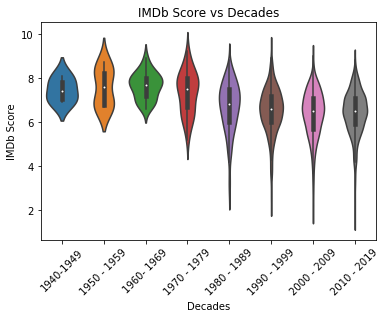

In [11]:
# Create the violinplot
IMDbyear = sns.violinplot(data = movies, x = 'decades', y = 'imdb_score', 
                          fliersize = 150)

# Aesthetics for the violinplot
IMDbyear.set_xlabel("Decades")
IMDbyear.set_ylabel("IMDb Score")
IMDbyear.set_title("IMDb Score vs Decades")
plt.setp(IMDbyear.get_xticklabels(), rotation=45)
plt.show()

### Average Budget vs. Content Rating

A relationship we explored was between content-rating and budget. We wanted to see if ratings have an influence on the budget for movie productions. 

As we can see below, movies rated G, PG-13, and PG have the highest budget overall. Rated R movies are in 4th place. Rated X movies had the lowest average budget.

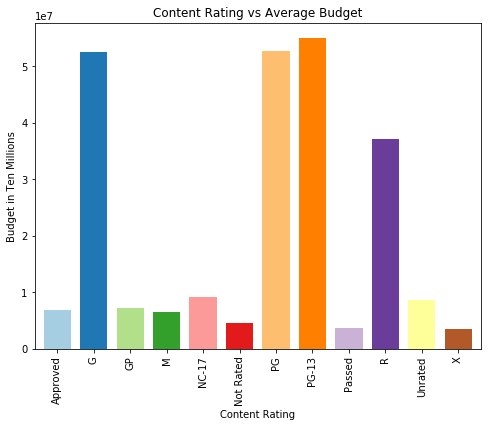

In [12]:
# Create a dataframe that is grouped by content-rating, but then find the mean
# of all numeric attributes
agg = movies.groupby('content_rating').mean()
ratings = agg.index.tolist()
budgets = agg.budget
df = pd.DataFrame({'content_rating': ratings,'budget': budgets})
ax = df.plot(kind = 'bar',    # Plot a bar chart
        legend = False,    # Turn the Legend off
        width = 0.75,      # Set bar width as 75% of space available
        figsize = (8, 6),  # Set size of plot in inches
        color = [plt.cm.Paired(np.arange(len(df)))])

# Aesthetics for the bar chart
ax.set_title('Content Rating vs Average Budget')
ax.set_xlabel('Content Rating')
ax.set_ylabel('Budget in Ten Millions')
plt.show()

### Content Rating vs. Gross

We can conclude that movies with PG, G, and M ratings tend to have higher gross averages. However, movies rated PG, PG-13, R, and G have the most extreme outliers.  Movies with ratings "Not Rated", "Unrated", "Passed", "GP", and "NC-17" don't appear often. Due to this limitation, their averages are not necessarily representative of their typical gross. 

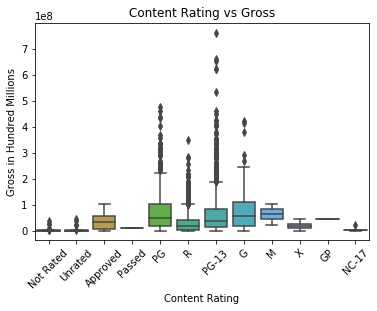

In [13]:
# Create a boxplot
grossrating = sns.boxplot(data = movies, x = 'content_rating', y = 'gross')

# Aesthetics for the boxplot
grossrating.set_xlabel("Content Rating")
grossrating.set_ylabel("Gross in Hundred Millions")
grossrating.set_title("Content Rating vs Gross")
plt.setp(grossrating.get_xticklabels(), rotation=45)
plt.show()

### Content Rating vs. Profit

Below we created two graphs. In the first graph, we see a few extreme outliers. The outliers represent how much profit was lost. The movies that appeared to have done the worst were from the Rated R category. Rated R appears to have the most extreme outliers, with PG-13 in second place. 

The second graph displays the same data without the negative extreme outliers. In the second graph, we see that PG-13 and PG movies had the most extreme positive outliers. These outliers represent the most profitable movies. Interestingly, Rated R and G movies also had many profitable outliers. 

From our graphs, we can conclude that mainstream ratings ('R', 'PG', 'PG-13', 'G') do affect profitability. 
 

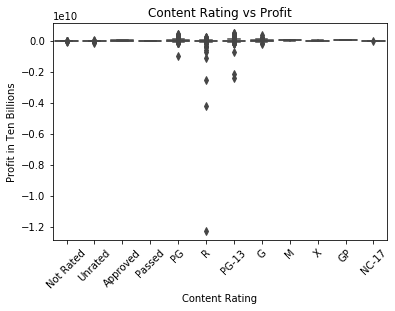

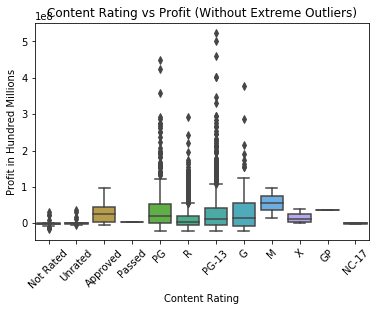

In [14]:
# Create a boxplot
grossprofit = sns.boxplot(data = movies, x = 'content_rating', y = 'profit')

# Aesthetics for the boxplot
grossprofit.set_xlabel("Content Rating")
grossprofit.set_ylabel("Profit in Ten Billions")
grossprofit.set_title("Content Rating vs Profit")
plt.setp(grossprofit.get_xticklabels(), rotation=45)
plt.show()
movies2 = movies.copy()

# Create another graph excluding the extreme outliers
indexNames = movies[movies['profit'] < -20000000].index
movies2 = movies2.drop(indexNames)
grossprofit2 = sns.boxplot(data = movies2, x = 'content_rating', y = 'profit')

# Aesthetics for the boxplot
grossprofit2.set_xlabel("Content Rating")
grossprofit2.set_ylabel("Profit in Hundred Millions")
grossprofit2.set_title("Content Rating vs Profit (Without Extreme Outliers)")
plt.setp(grossprofit2.get_xticklabels(), rotation=45)
plt.show()

### IMDb Score vs. Gross

Next, we look at the relationship between IMDb scores and gross. From the plot, we see that the highest rated movies have the highest average gross. However, it is important to note that movies with ratings from 5.8 to 8.6 had a large amount of movies with very high grosses, 4 of which beat the highest grossing movie in the 8.6-9.3  rating. However, there appears to be a general trend of the higher the movie rating, the more money it made.

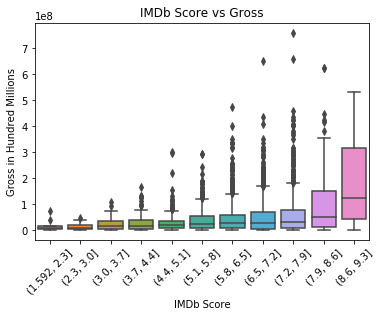

In [15]:
# Create a boxplot
grossscore = sns.boxplot(data = movies, x = 'scores', y = 'gross')

# Aesthetics for the boxplot
grossscore.set_xlabel("IMDb Score")
grossscore.set_ylabel("Gross in Hundred Millions")
grossscore.set_title("IMDb Score vs Gross")
plt.setp(grossscore.get_xticklabels(), rotation=45)
plt.show()

### By the Decade: Profit vs. Year 

We wanted to see if there was a relationship between the profit and the year the film came out. This relation tests to see if there is a general trend that can be observed that may give insight to the amount of profit a film can obtain just by being produced in a certain year.

The first chart looks at the year and profit of films made within a specific decade. This gives us not only an understanding of how films faired during a period but how saturated the industry was during that decade.

The second chart displays the overall year and profit of all films.

The extreme negative outliers were removed from both graphs to give a better overview of the data.

As we have observed in other plots above, as time increases, the profit made becomes more positively consistent across the years. The second graph clearly shows how several films stay within a specific profit margin. Aside from the outliers, most films see a profit but some extremely positive outliers show movies doing particularly better with a specific year.






In [16]:
# Creates dropdown menu for time periods 
values = sorted(movies['decades'].unique())  
period = widgets.Dropdown(
        options=values,
        value='1940-1949',
        description='Time Period:',
   )

def profit_decade_plt(pt): 
  df = movies[movies['decades'] == pt]
  df = df[df['profit'] > -20000000]
  df2 = movies[movies['profit'] > -20000000]

  # Set the parameters for X and Y 
  X = df['title_year'].values.reshape(-1,1)
  Y = df['profit'].values.reshape(-1,1)

  # Create the linear regression 
  regr = LinearRegression().fit(X, Y)

  # Create the prediction of the X value based on the linear regression
  prediction = regr.predict(X)

  # Create a color list
  length = len(df)
  colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(length)]

  length2 = len(df2)
  colors2 = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(length2)]

  # Decade Year v. Profit
  ax = df.plot.scatter(title="Profit v. Year:\n{}".format(pt),
                  x='title_year', 
                  y='profit',
                  color=colors)
  # Line of best fit for Decade Plot
  plt.plot(X, prediction, color='k', linewidth=.5)
  
  # Full Year v. Profit Plot 
  bx = df2.plot.scatter(title="Profit v. Year",
                  x='title_year', 
                  y='profit', 
                  color=colors2)
  
  # Aesthetic for the Graph:  Labels
  ax.set_ylabel('Profit')
  ax.set_xlabel('Year')
  bx.set_ylabel('Profit')
  bx.set_xlabel('Year')

  plt.setp(ax.get_xticklabels(), rotation=45)
  

  plt.setp(bx.get_xticklabels(), rotation=45)
  

interactive(profit_decade_plt, pt=period)

interactive(children=(Dropdown(description='Time Period:', options=('1940-1949', '1950 - 1959', '1960- 1969', …

### Movie Count vs. Genre

Utilizing the Movie Count-Genre dataset, we plotted the number of movies within the movies dataset based on their genre. In the movies dataset, most of the movies have more than one genre attributed to it. Due to this, many of the movies are counted many times across each genre. We use this to understand how movies are categorized throughout the year and which were the most popular categorization within the movies datasets. 

Based on this visualization, we can see that most movies are categorized as "Drama", followed by categories of "Comedy" and "Action". There are not many movies that are classified as "Short", "Musical", and "Film-Noir" within the dataset. 

This could suggest that the categories that have a few classifications are not popular genres for movies, whereas films that are considered "Action", "Comedy", and "Drama" are very popular. 

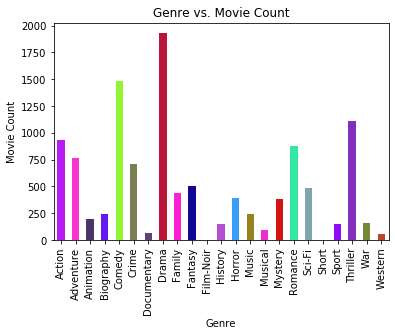

In [17]:
length = len(mc_genre)

# Aesthetics for the bar chart
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(length)]

ax = mc_genre.plot.bar(title = 'Genre vs. Movie Count', x = 'Genre', 
                       y = 'Movie Count', color = colors)
ax.get_legend().remove()
ax.set_ylabel('Movie Count')

plt.show()

### By the Decade: Profit vs. Budget 

This visualization is used to show the profits made per year separated by decades. 

Before the 1970s, the linear regression line showed that there was a slight correlation that as the budget increased, the profit of the film increased. 

However, that trend changed after the 1970s, where it can be seen that the budget of movies that came out within their respective decades had similar budgets and had varied profits from those budgets. Especially after the 1980s, nearly every movie that came out during their respective decades were within a very close interval in budgets. 

When a film had a large budget outside the norm of others within the decade, the film tends to fail in profits, causing the negative linear regression line. 

This could suggest that a film's budget began to have very little effect on its profitability. 

In [18]:
# Creates dropdown menu for time periods 
values = sorted(movies['decades'].unique())  
period = widgets.Dropdown(
        options=values,
        value='1940-1949',
        description='Time Period:',
   )

def profit_budget_plt(pt): 
  decade = movies[movies['decades'] == pt]

  # Set the parameters for X and Y 
  X = decade['budget'].values.reshape(-1,1)
  Y = decade['profit'].values.reshape(-1,1)

  # Create the linear regression 
  regr = LinearRegression().fit(X, Y)

  # Create the prediction of the X value based on the linear regression
  prediction = regr.predict(X)


  # Create a color list
  length = len(decade)
  colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(length)]

  ax = decade.plot.scatter(title="Budget v. Profit:\n{}".format(pt),
                  x='budget', 
                  y='profit',
                  color=colors)
  
  # Aesthetic for the Graph:  Labels
  ax.set_ylabel('Profit')
  ax.set_xlabel('Budget')
  plt.xticks(rotation ='45')
  
  plt.plot(X, prediction, color='k')
  plt.show()


In [19]:
interactive(profit_budget_plt, pt=period)

interactive(children=(Dropdown(description='Time Period:', options=('1940-1949', '1950 - 1959', '1960- 1969', …

## Machine Learning
### Machine Learning: Simple Linear Regression
Below, we constructed a single linear regression model performed on the movie years to determine what linear relationship exists between year and profit. Due to large outliers present in the data, the overall linear regression model shows a drastic, negative trend in profit across time. We chose to make two plots (one for the line of best fit and the other with the scatterplot) to show the model line clearly. 

To get a more fair representation of the data, we must incorporate an interaction term for each genre of film. This will help us understand the relationship between year and profit for each genre. We did this in the next section. 

In [20]:
# Fit the linear regression model
reg = linear_model.LinearRegression()
Xs = np.array(genre_df['Year']).reshape(-1, 1)
ys = genre_df['Profit']

# Fit the model
reg.fit(Xs, ys)

# Calculate the predictions given the year
profits = reg.predict(np.array(genre_df['Year']).reshape(-1, 1))

# Return the coefficients for the year variable and y intercept.
print("The slope of the model is: {}".format(reg.coef_))
print("The y-intercept of the model is: {}".format(reg.intercept_))

The slope of the model is: [-4483234.71265635]
The y-intercept of the model is: 8909616033.342546


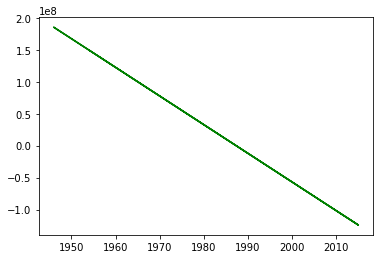

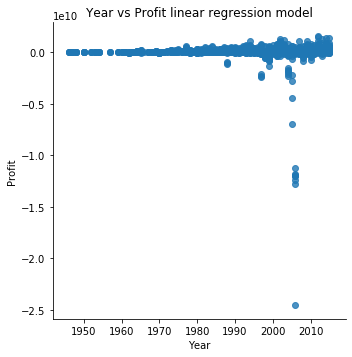

In [21]:
# Place the linear model onto the same plot
plt.plot(genre_df['Year'], profits, color='green')
# Make a scatter plot of the different profit distributions per year
sns.lmplot(x="Year", y="Profit", data=genre_df, fit_reg=False)
# Title 
plt.title('Year vs Profit linear regression model')
plt.show()

### Machine Learning: Multiple Linear Regression
Below, we fit an interaction term in relation to the movie genre to differentiate how the profit changed across time. The model above, which included all movies regardless of genre, is not representative of how profit changes in accordance to genre. Therefore, we created a series of linear regression models for each genre to see if there is drastic and slight change.

In [22]:
m2  = genre_df.copy()
# Fit linear regression model with interaction term on profit per year 
# for each genre
model2 = sm.ols(formula='Profit ~ Year * Genre', data=m2).fit()
# Create a column in the dataframe with predicted values using the 
# regression model
m2['Predicted'] = model2.predict(m2)
# Calculate the residuals by finding the difference between the actual and 
# predicted values
m2['Residual'] = m2['Profit'] - m2['Predicted']
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.4982
Date:                Mon, 16 Dec 2019   Prob (F-statistic):              0.998
Time:                        13:38:40   Log-Likelihood:                -19727.
No. Observations:                 877   AIC:                         3.954e+04
Df Residuals:                     832   BIC:                         3.976e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

#### Looking at profit trends over time for two genres: (History and Animation) 
In this section, we selected profit distributions for two specific genres to determine what the different trends are for each genre.

The first genre we selected, History, shows a negative, steadily decreasing trend in profits for films across time. We can also see that there is greater spread after the year 2000. 

The second genre, Animation, has a positive, increasing trend in profits for film across time. We also see 3 specific films situated right before 1990, around 1997, and 2004. 

In [23]:
# Historical and Animated Films Datasets 
history_df = m2[m2['Genre'] == 'History']
animation_df = m2[m2['Genre'] == 'Animation']

In [24]:
history_df.reset_index()
history_df.head()

,Genre,Year,Profit,Predicted,Residual
422,History,1953.0,31000000.0,2.842842e+07,2.571583e+06
423,History,1962.0,-9000000.0,1.143771e+07,-2.043771e+07
424,History,1963.0,26635000.0,9.549852e+06,1.708515e+07
425,History,1965.0,-12000000.0,5.774140e+06,-1.777414e+07
426,History,1970.0,2200000.0,-3.665143e+06,5.865143e+06


In [25]:
animation_df.reset_index()
animation_df.head()

,Genre,Year,Profit,Predicted,Residual
106,Animation,1988.0,-1.063968e+09,-4.970570e+08,-5.669110e+08
107,Animation,1992.0,1.893502e+08,-3.680968e+08,5.574470e+08
108,Animation,1993.0,-2.733072e+07,-3.358568e+08,3.085260e+08
109,Animation,1994.0,3.777838e+08,-3.036167e+08,6.814005e+08
110,Animation,1995.0,2.483962e+08,-2.713767e+08,5.197729e+08


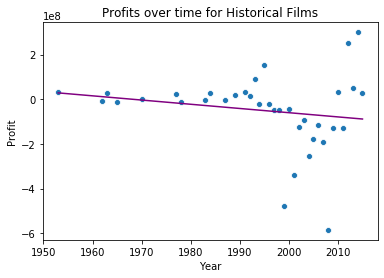

In [26]:
# Historical film scatter plot 
sns.scatterplot(x=history_df['Year'], y=history_df['Profit'])
# Fit interaction model on history profits
plt.plot(history_df['Year'], history_df['Predicted'], color='purple')
plt.title('Profits over time for Historical Films')
plt.show()

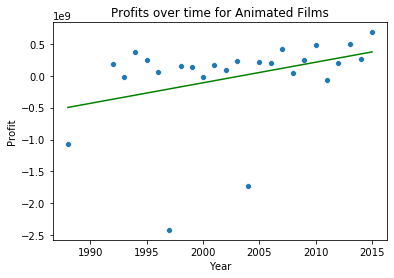

In [27]:
# Animated film scatter plot 
sns.scatterplot(x=animation_df['Year'], y=animation_df['Profit'])
# Fit interaction model on animation profits
plt.plot(animation_df['Year'], animation_df['Predicted'], color='green')
plt.title('Profits over time for Animated Films')
plt.show()

### Write up: Genre as an Interaction term 
Above, we can see that an interaction term was necessary to understand the trends of profit for our film dataset. We can see that there is a relationship between year and profit for each genre. Additionally, we can see that this relationship is different for each corresponding genre. Above, we determined that historical films have been decreasing in profit across time while animated films have increased steadily across time.

From the table above of our regression results, we can see that the p-values are larger than our significance value of 0.05. Therefore, we fail to reject our null-hypothesis that genre does not determine a film's success. We must accept the null-hypothesis because there is insufficient evidence to support the claim that movie genre determines a film's success. For further exploration, we can look at interaction terms for the IMBD scores and others to determine if they have a significant impact on a film's success.


### Violinplot for Residual Profits by Genre
Below is a residual plot for profits for each genre. We split the genre list in half to get a better look at the violin plots. 

From our plots, we can see that there are certain genres with wider violinplots because of outliers. Some of these include Action, Adventure, Comedy and Science Fiction. This is likely due to the greater population sizes of these genres. In contrast, there are certain genres with smaller violinplots. This is due to a small number of films of that genre type. The genre with the widest violinplot is Sci-Fi. 

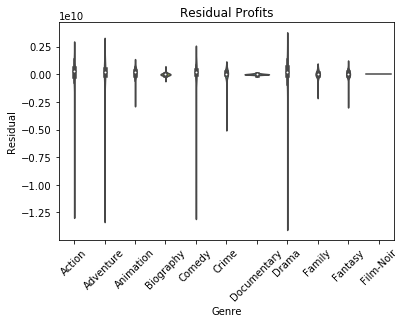

In [28]:
# Genres: Action, Adventure, Animation, Biography, Comedy, Crime, Documentary
# Drama, Family, Fantasy, Film-Noir

# Split the profits vs. genre dataframe into two dataframes
m3 = m2[m2['Genre'] < 'H'] 
m4 = m2[m2['Genre'] > 'H'] 
# First half (first 11 genres alphabetically) of residual violinplots 
sns.violinplot(x=m3['Genre'], y=m3['Residual']).set_title('Residual Profits')
plt.xticks(rotation ='45')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

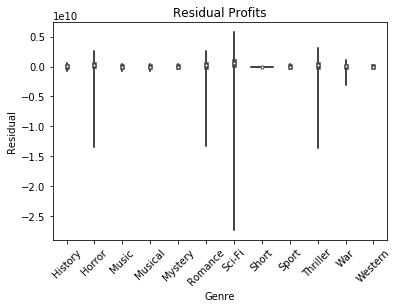

In [29]:
# History, Horror, Music, Musical, Mystery, Romance, Sci-Fi, Short, Sport
# Thriller, War, Western

# Second half (second 12 genres alphabetically) of residual violinplots 
sns.violinplot(x=m4['Genre'], y=m4['Residual']).set_title('Residual Profits')
plt.xticks(rotation ='45')

# Conclusion: 

In summary, we wanted to test and explore a movie dataset to figure out which variables within a film will determine whether or not it becomes successful. To do this, we established that profit was an important factor to analyze and incorporate into our data exploration. We began by cleaning up our data for missing values and removing unnecessary variables to narrow down our search. We selected IMDb scores, profit, genres, director names, gross, budget, and content-ratings as columns for our main dataset. 

We generated a series of dataframes to better understand the distribution of our dataset. This meant tracking down the allocation of films by genre and director. In addition to this, we determine how much profit each genre made over time. From this, we found that Drama, Comedy and Thriller were the most popular genres. For directors, Steven Spielberg, Woody Allen, and Clint Eastwood have directed the highest number of films.

In our exploration section, we took a look at profit distributions for our 30 selected directors across time. Then, we looked at what content-ratings were the most common (we found that PG-13, PG, and G had the highest counts in that order respectively). We determined that profit and budget had a positive relationship before the 70s. This is likely because there were less films being made and available before 1970. Additionally, the profit distribution across time showed that profits were generally positive (with the exception of a few outliers) until the 21 century. In the 21 century plot, we can see that there are more films below and above the x axis, indicating that more films made negative profit (made less than their budget) as well as more films that made more profit. From our IMDb scores vs. gross, we can see that gross and IMDb scores have a positive relationship, so when IMDb scores ranges increase, when gross increases. 

For our machine learning section, we performed both simple and multiple regression on movie title year and profit. At a significance level (alpha) of 0.05, we found that we cannot reject the null hypothesis that year does not determines a film's success. Additionally, we discovered that our interaction term (genre) did not have a significant impact in determining a film's success either. This was determined because our p-values were greater than 0.05. 

Through this project, we were able to learn more about how the characteristics of films affect their profitability.  We were able to interpret why films produced within a specific decade exhibit certain trends (i.e. films made closer to the 40s and 50s had produced higher profit values due to the lack of films available and because films became more viable after this time). We can conclude that there is a  relationship present between an IMDB score and profit (generally IMDb scores are higher for films with higher profit). Also, that characteristics such as director and budget have an effect on the profit of a film. However, we weren't able to determine what characteristic(s) directly affect a film's success. We believe that more factors need to be considered when determining what creates the "theatricality" for a film and what drives people to the movie theatre. We encourage future projects to look deeper into other characteristics of films to determine this answer.

# Project Notes
This project was created by Laura Anyanwu, Claire Lee, and Su'ad Mohamud as a project for the CMSC 320 Data Science class offered to undergraduate students under the Computer Science department at the University of Maryland-College Park. 

# Credits
The data was obtained from [IMDB 5000 Movie Dataset](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset#movie_metadata.csv). The visualizations were designed using Python libraries.